# 1.0 Full Exploratory Data Analysis

## Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Download data

### Specify input and output files

In [3]:
covid_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

### Run download

In [13]:
!curl {covid_url} -o {covid_file}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file c:\Users\TUF: Permission denied

  0 1119k    0  1371    0     0   3573      0  0:05:20 --:--:--  0:05:20  3589
curl: (23) Failure writing output to destination
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: GAMER\Desktop\Trabajos2021\Platzi\Curso
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0    

## Process data

### Read data

In [4]:
input_covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

In [6]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 790 entries, Province/State to 3/17/22
dtypes: float64(2), int64(786), object(2)
memory usage: 1.7+ MB


In [7]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/22,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,175353,175525,175893,175974,176039,176201,176409,176571,176743,176918
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272337,272412,272479,272552,272621,272663,272689,272711,272804,272885
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265323,265346,265366,265391,265410,265432,265457,265478,265496,265511
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38710,38794,38794,38794,38794,38794,38794,38794,38794,39234
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98829,98855,98855,98855,98909,98927,98931,98956,98985,99003


### Process data

In [8]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [9]:
output_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [10]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [11]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [12]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223224 entries, 0 to 223223
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  223224 non-null  object
 1   date            223224 non-null  object
 2   value           223224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [13]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [14]:
sns.set_style("whitegrid")

In [15]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [16]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

In [17]:
import final_project.visualization.visualize as visualize

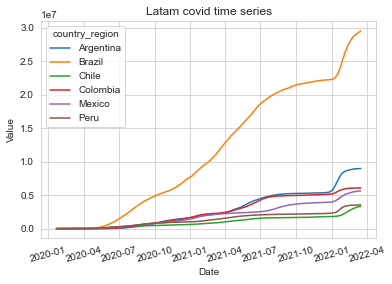

In [18]:
visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [20]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,20558506273,lightblue
1,India,13390645414,lightblue
2,Brazil,9093003895,red
3,France,3809715337,lightblue
4,United Kingdom,3739009466,lightblue


Plot to Latam in highlighted bars.

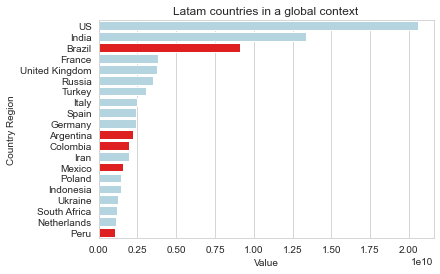

In [22]:
visualize.latam_grafic(top_countries_df)